In [160]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
#standard scaler import
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [161]:
#read csv file
df = pd.read_csv(r'C:\Users\ASUS\Desktop\ML Lab Prac\ML Lab\Logistic and Stocastic\iris-data.csv')

#check last column unique values
print(df['class'].unique())

['Iris-setosa' 'Iris-versicolor']


In [162]:
#check not null
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [163]:
#handle null values
df.dropna(inplace=True)
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [164]:
#last column value to integer
df['class'] = df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})
df.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [165]:
input = df.drop('class', axis='columns')
output = df['class']

#Use standard scaler
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input)

#add bias
input_scaled = np.append(np.ones((input_scaled.shape[0], 1)), input_scaled, axis=1)

#split data
X_train, X_test, y_train, y_test = train_test_split(input_scaled, output, test_size=0.2, random_state=0)

#show shapes 
print(X_train.shape)
print(X_test.shape)

#expand dims
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

print(y_train.shape)
print(y_test.shape)
 


(76, 5)
(19, 5)
(76, 1)
(19, 1)


[[ 0.06954322]
 [ 0.12609992]
 [-0.91259527]
 [ 1.26100438]
 [ 1.24039833]]


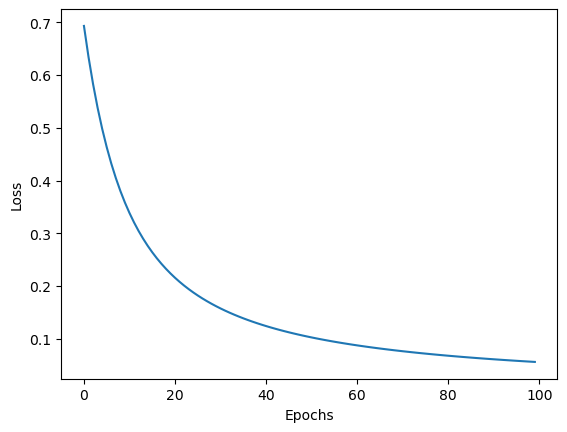

In [166]:
#Logistic Regression
#model function create
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def yhat(X, W):
    return sigmoid(np.dot(X, W))
def loss(a, y):
    return (-y * np.log(a) - (1 - y) * np.log(1 - a)).mean()
def gradient(X, a, y):
    return np.dot(X.T, (a - y)) / y.shape[0] #dw = 1/m * X.T * (a-y)
def update(W, g, lr):
    return W - lr * g
def logistic_regression(X, y, lr, epochs):
    loss_history = []
    W = np.zeros((X.shape[1], 1))
    for i in range(epochs):
        a = yhat(X, W)
        loss_history.append(loss(a, y))
        g = gradient(X, a, y)
        W = update(W, g, lr)
    return W, loss_history

#train model
W, loss_history = logistic_regression(X_train, y_train, lr=0.1, epochs=100)
print(W)
#print loss graph 
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show() 




In [167]:
#predict
y_pred = yhat(X_test, W)
#convert to 0 or 1
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [168]:
#acuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#f1
print("F1 Score:", metrics.f1_score(y_test, y_pred))
#confusion matrix with labels
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 1.0
F1 Score: 1.0


array([[ 8,  0],
       [ 0, 11]], dtype=int64)